In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf


In [43]:
def loss(model, x, y):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

def pack_features_vector(features, labels):
    #come together characteristics into one array
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)


def SoftMax () : 
    print("Version Of tensorflow: {}".format(tf.__version__))
    train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

    train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

    print("Dataset copy place: {}".format(train_dataset_fp))
    
    # Column order
    column_names = ['beverage_length', 'beverage_width', 'price_length', 'price_width', 'kind']

    feature_names = column_names[:-1]
    label_name = column_names[-1]

    print("Characteristic: {}".format(feature_names))
    print("Labels: {}".format(label_name))
    
    #creating Dataset
    
    batch_size = 32

    train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)
    
    features, labels = next(iter(train_dataset))

    print(features)
    
    # Checking data from batch
    plt.scatter(features['beverage_length'],
            features['price_length'],
            c=labels,
            cmap='viridis')

    plt.xlabel("beverage_length")
    plt.ylabel("price_length")
    plt.show()
    
    train_dataset = train_dataset.map(pack_features_vector)
    
    features, labels = next(iter(train_dataset))

    print(features[:5])
    
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # 입력의 형태가 필요합니다.
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
    ])
    
    predictions = model(features)
    # show 5 samples
    predictions[:5]
    
    tf.nn.softmax(predictions[:5])
    
    l = loss(model, features, labels)
    print("Loss test: {}".format(l))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    loss_value, grads = grad(model, features, labels)

    print("Step: {}, initial loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    print("Step: {},      loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))
    
    
    #Running this cell again uses variables from the same model.
    train_loss_results = []
    train_accuracy_results = []

    num_epochs = 201

    for epoch in range(num_epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
        for x, y in train_dataset:
            loss_value, grads = grad(model, x, y)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            epoch_loss_avg(loss_value)  # 현재 배치 손실을 추가합니다.
            epoch_accuracy(y, model(x))

    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))
        
    #ref : https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough


Version Of tensorflow: 2.0.0
Dataset copy place: C:\Users\GC\.keras\datasets\iris_training.csv
Characteristic: ['beverage_length', 'beverage_width', 'price_length', 'price_width']
Labels: kind
OrderedDict([('beverage_length', <tf.Tensor: id=337937, shape=(32,), dtype=float32, numpy=
array([7.3, 5.3, 5.4, 5.6, 6. , 6.7, 5.5, 6.5, 6.3, 6.3, 6.2, 6.2, 5. ,
       5.7, 4.4, 6.1, 5.4, 6.6, 6.8, 4.9, 6.4, 6. , 5.4, 5.1, 6.5, 6.9,
       5. , 4.9, 4.6, 6.1, 5. , 6.1], dtype=float32)>), ('beverage_width', <tf.Tensor: id=337938, shape=(32,), dtype=float32, numpy=
array([2.9, 3.7, 3.7, 2.7, 3. , 3. , 2.4, 3. , 3.3, 2.7, 2.2, 2.8, 3.3,
       2.8, 3.2, 2.8, 3. , 3. , 3.2, 3.1, 3.1, 2.9, 3.4, 3.8, 2.8, 3.1,
       2.3, 3.1, 3.2, 2.6, 3.2, 3. ], dtype=float32)>), ('price_length', <tf.Tensor: id=337939, shape=(32,), dtype=float32, numpy=
array([6.3, 1.5, 1.5, 4.2, 4.8, 5. , 3.8, 5.5, 6. , 4.9, 4.5, 4.8, 1.4,
       4.5, 1.3, 4. , 4.5, 4.4, 5.9, 1.5, 5.5, 4.5, 1.5, 1.5, 4.6, 5.1,
       3.3, 1.5, 1.4

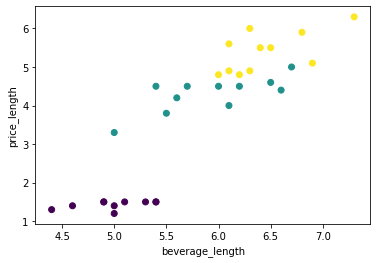

tf.Tensor(
[[5.8 2.7 4.1 1. ]
 [6.3 3.3 6.  2.5]
 [4.7 3.2 1.3 0.2]
 [6.4 2.8 5.6 2.2]
 [7.7 2.6 6.9 2.3]], shape=(5, 4), dtype=float32)
Loss test: 1.5851478576660156
Step: 0, initial loss: 1.5851478576660156
Step: 1,      loss: 1.3258764743804932
Epoch 200: loss: 0.045, Accuracy: 98.333%


In [44]:
SoftMax()